* https://langchain-ai.github.io/langgraph/tutorials/introduction/
* https://langchain-ai.github.io/langgraph/how-tos/subgraph/#define-subgraphs 

In [1]:
from dotenv import load_dotenv

load_dotenv() 


True

In [2]:
from graph_builders import create_default_casual_chatbot_graph_builder 

basic_casual_chatbot_graph = create_default_casual_chatbot_graph_builder() 

In [3]:
from graph_builders import create_rigorous_llm_graph 

rigorous_llm_graph_builder = create_rigorous_llm_graph(
    chatbot_subgraph=basic_casual_chatbot_graph
)

rigorous_llm = rigorous_llm_graph_builder.compile() 

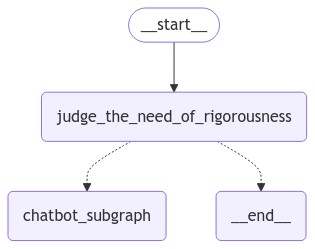

In [4]:
from IPython.display import Image, display

try:
    display(Image(rigorous_llm.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [5]:
def stream_graph_updates(user_input: str):
    for event in rigorous_llm.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    stream_graph_updates(user_input)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True


Assistant: Rigorousness required


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True


Assistant: Rigorousness required


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: True


Assistant: Rigorousness required


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Judgement of the need of rigorousness: False


Assistant: Just casual chat


INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Assistant: Sure! How was your day today?
Goodbye!
